In [19]:
import torch
import matplotlib.pyplot as plt
import math

def logistic_loss(y, f): # f is model output, y is corresponding class
    return - (1 + (-y*f).exp()).log()
y = 1
f = torch.range(-5,5,0.01, requires_grad=True)
l = logistic_loss(y,f)
plt.plot(f,l.cpu().numpy())
plt.show()


/var/folders/kk/r4qs20xx1pbcd8xfjh2_6xtr0000gn/T/ipykernel_79685/1207349631.py:10: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  f = torch.range(-5,5,0.01, requires_grad=True)


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:

import torchvision
import torch

train_dataset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
test_dataset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=100, shuffle=True, num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=100, shuffle=False, num_workers=2
)



100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%
0.7%

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Number of training samples: 60000
Number of test samples: 10000


In [20]:
clothes_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

interested_clothes_to_class = {
    7: 1,
    2: -1,
    # 5: -1,
    # 6: -1
}

In [52]:

X = torch.empty((1,28,28))
Y = torch.empty((1,2))
p = 0
for batch_x,batch_y in train_loader:
    if p > 300:
        break
    p += 1
    for i in range(len(batch_x)):
        if batch_y[i].item() in interested_clothes_to_class:
            X = torch.cat((X, batch_x[i]))
            if interested_clothes_to_class[batch_y[i].item()] == 1:
                Y = torch.cat((Y, torch.tensor([1,0]).reshape((1,2))))
            else:
                Y = torch.cat((Y, torch.tensor([0,1]).reshape((1,2))))
            
print(Y.shape)
print('\nX:\n',X,'\nY:\n',Y)

torch.Size([11982, 2])

X:
 tensor([[[ 0.0000e+00,  0.0000e+00, -1.6858e-38,  ...,  4.5862e-41,
          -1.6859e-38,  4.5862e-41],
         [-1.6859e-38,  4.5862e-41, -1.6859e-38,  ...,  4.5862e-41,
          -1.6860e-38,  4.5862e-41],
         [-1.6860e-38,  4.5862e-41, -1.6860e-38,  ...,  4.5862e-41,
          -1.6860e-38,  4.5862e-41],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-5.6639e-29,  4.5862e-41, -1.8509e+31,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-8.9841e-31,  4.5862e-41,  1.0563e-22,  ...,  4.5862e-41,
          -1.0207e-38, -3.0665e+24]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         ..

In [55]:
d = torch.rand((5,2))
print(d[0].shape)

torch.Size([2])


/Users/kobikelemen/Documents/computing/ML/dive-deep-into-DL/dl/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/Users/kobikelemen/Documents/computing/ML/dive-deep-into-DL/dl/lib/python3.8/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


3019  /  5991
2972  /  5991
3019  /  5991
3019  /  5991
3019  /  5991
2972  /  5991
3019  /  5991
3019  /  5991
3019  /  5991
3019  /  5991
tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])


/var/folders/kk/r4qs20xx1pbcd8xfjh2_6xtr0000gn/T/ipykernel_79685/3329144105.py:105: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  epoch = torch.range(1,num_epochs,1)


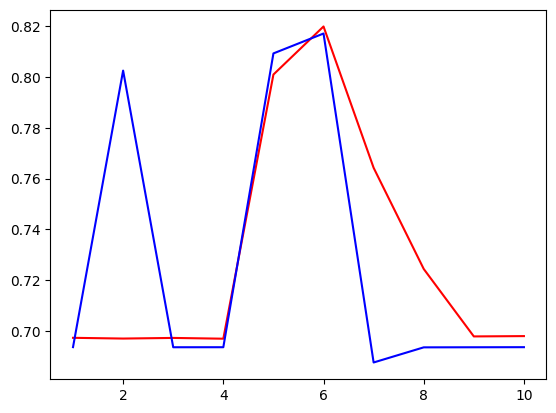

In [102]:
import torch.nn as nn

class LinearNetwork(nn.Module):
    def __init__(self, lr, weight_decay):
        super(LinearNetwork, self).__init__()
        self.lr = lr
        self.weight_decay = weight_decay
        self.net = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.Linear(128,2),
            nn.LazyLinear(2), # 2 output classes (-1 and 1)
            nn.Softmax()
        )
        self.loss = nn.CrossEntropyLoss()
        self.optim = torch.optim.Adam(self.net.parameters(), lr=self.lr, weight_decay=self.weight_decay)

    def forward(self, x):
        x = self.net(x)
        return x
    
    def logistic_loss(self, y, y_hat): # y_hat is model output, y is corresponding class
        return self.loss(y, y_hat)


    
    def rmseloss(self, features, labels):
        clipped_preds = torch.clamp(self.net(features.reshape((1,784))), 1, float('inf'))
        rmse = torch.sqrt(2 * self.logistic_loss(clipped_preds.log().reshape((2)), labels.log()).mean())
        return rmse.item()
    
    def get_batches(self, batch_size, features, labels):
        num_batches = len(features) // batch_size
        for i in range(num_batches):
            start = i * batch_size
            end = start + batch_size
            batch_features = features[start:end]
            batch_labels = labels[start:end]
            yield batch_features.float(), batch_labels.float()

        if num_batches * batch_size < len(features):
            # There are some leftover data points.
            start = num_batches * batch_size
            end = len(features)
            batch_features = features[start:end]
            batch_labels = labels[start:end]\
                
            yield batch_features.float(), batch_labels.float()
            

    def train(self, train_features, train_labels, test_features, test_labels, num_epochs, batch_size):
        train_loss, test_loss = [], []
        for epoch_index in range(num_epochs):
            epoch_loss = []
            for i in range(len(train_features)):
                X = train_features[i]
                y = train_labels[i]
                yhat = self.net(X.reshape((1,784))) # forward()
                l = self.logistic_loss(yhat.reshape((2)), y)
                epoch_loss.append(l.item())
                self.optim.zero_grad()
                with torch.no_grad():
                    l.backward()
                    self.optim.step()
            
            train_loss.append(sum(epoch_loss) / len(epoch_loss))
            
            if test_features != None:
                epoch_loss = []
                num_correct = 0
                for i in range(len(test_features)):
                    X = test_features[i]
                    y = test_labels[i]
                    yhat = self.net(X.reshape((1,784))) # forward()
                    l = self.logistic_loss(yhat.reshape((2)), y)
                    epoch_loss.append(l.item())
                    if check_correct(y,yhat.reshape((2))):
                        num_correct += 1
                print(num_correct, ' / ', len(test_features))
                test_loss.append(sum(epoch_loss) / len(epoch_loss))
        return train_loss, test_loss
        
def check_correct(y,yhat):
    if y[0] == 1 and yhat[0] > 0.5:
        return True
    if y[1] == 1 and yhat[1] > 0.5:
        return True
    return False
    



k, num_epochs, lr, weight_decay, batch_size = 5, 10, 0.1, 0.99, 64
net = LinearNetwork(lr, weight_decay)
train_features = X[:X.shape[0] // 2]
train_labels = Y[:Y.shape[0] // 2]
test_features = X[X.shape[0] // 2:]
test_labels = Y[Y.shape[0] // 2:]

train_loss, valid_loss = net.train(train_features, train_labels, test_features, test_labels, num_epochs, batch_size)

epoch = torch.range(1,num_epochs,1)
print(epoch)
plt.plot(epoch, train_loss, 'r-',label='train')
plt.plot(epoch, valid_loss, 'b-',label='test')
plt.show()